# Part 4 project: Mandelbrot set

In [1]:
# NumPy
import numpy as np

# JAX
import jax
import jax.numpy as jnp

jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_enable_x64", True)

# Numba
import numba as nb

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt

### Basic Python Implementation

In [2]:
def mandelbrot_python(height, width):
  y, x = np.ogrid[-1:0:height*1j, -1.5:0:width*1j]
  c = x + y*1j
  fractal = np.full(c.shape, 20, dtype=np.int32)
  for h in range(height):
    for w in range(width):            # for each pixel (h, w)...
      z = c[h, w]
      for i in range(20):             # iterate at most 20 times
        z = z**2 + c[h, w]            # applying z → z² + c
        if abs(z) > 2:                # if it diverges (|z| > 2)
          fractal[h, w] = i           # color the plane with the iteration number
          break                       # we're done, no need to keep iterating
  return fractal

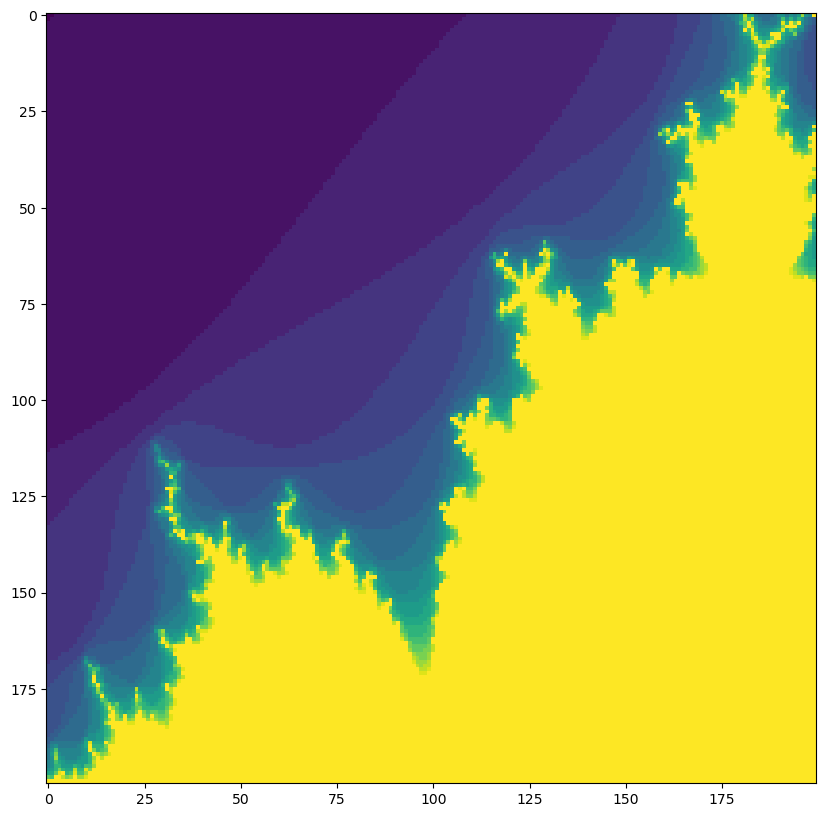

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mandelbrot_python(200, 200))

In [4]:
%%timeit -n 10 -r 3

mandelbrot_python(200, 200)

70 ms ± 917 μs per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [5]:
%%timeit -n 1 -r 1

mandelbrot_python(2000, 2000)

7.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Oh no, this calculation scales with $height \times width$ ($\mathcal{O}(N^2)$)!

Let's switch from Python to NumPy:

In [6]:
def mandelbrot_numpy(height, width):
    y, x = np.ogrid[-1:0:height*1j, -1.5:0:width*1j]
    c = x + y*1j
    fractal = np.full(c.shape, 20, dtype=np.int32)
    z = c
    for i in range(20):
        z = z**2 + c                                 # applying z → z² + c
        diverged = z.real**2 + z.imag**2 > 4         # |z| > 2 is "divergence"
        diverging_now = diverged & (fractal == 20)   # some are already done
        fractal[diverging_now] = i                   # just set the new ones
        z[diverged] = 2                              # clamp diverged at 2
    return fractal

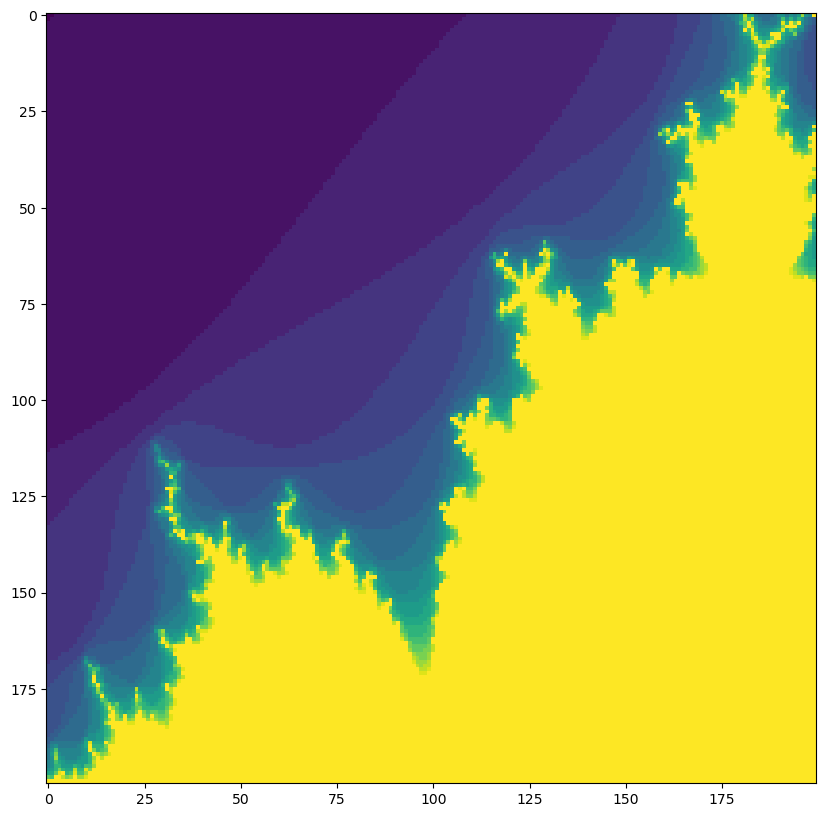

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mandelbrot_numpy(200, 200))

In [8]:
%%timeit -n 10 -r 3

mandelbrot_numpy(200, 200)

2.6 ms ± 185 μs per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [9]:
%%timeit -n 1 -r 1

mandelbrot_numpy(2000, 2000)

333 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Much better, but can it be even _faster_?

## Your task

Find a faster solution to calculate this patch of the mandelbrot set in:

1. JAX
2. Numba

In [10]:
# your implementation here...

### Bonus task

What's the highest resolution you can achieve that takes less than 1s?

In [11]:
# your implementation here...